In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import plotly_express as px
plt.style.use('bmh')

In [3]:
df = pd.read_excel('Volve production data.xlsx')

<AxesSubplot:>

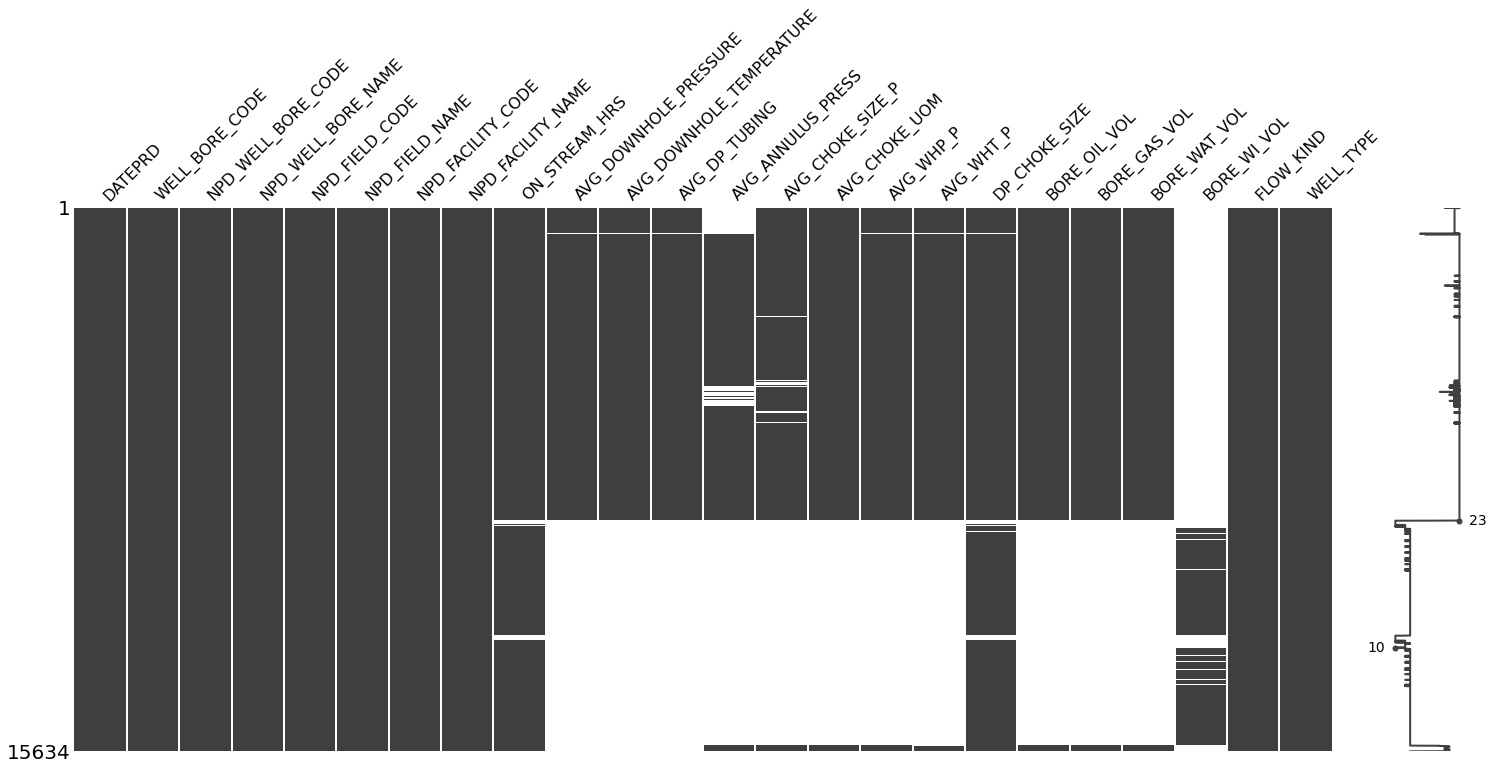

In [4]:
msn.matrix(df)

In [8]:
df_ml = df[ [ "DATEPRD", "NPD_WELL_BORE_NAME", "ON_STREAM_HRS", "AVG_DOWNHOLE_PRESSURE",
            "AVG_DOWNHOLE_TEMPERATURE", "AVG_DP_TUBING", "BORE_OIL_VOL", "BORE_WI_VOL",
           "BORE_GAS_VOL", "BORE_WAT_VOL", "AVG_WHP_P", "AVG_WHT_P", "DP_CHOKE_SIZE"
           ] ]

In [9]:
df_ml.rename(columns={
    'DATEPRD': 'date',
    'NPD_WELL_BORE_NAME': 'well_name',
    'ON_STREAM_HRS': 'prod_hrs',
    'AVG_DOWNHOLE_PRESSURE': 'bhp',
    'AVG_DOWNHOLE_TEMPERATURE': 'bht',
    'AVG_DP_TUBING': 'dp_tubing',
    'AVG_CHOCK_SIZE_P' : 'production_chok_size',
    'AVG_WHP_P': 'thp',
    'AVG_WHT_P': 'tht',
    'DP_CHOKE_SIZE': 'choke_size_percentage',
    'BORE_OIL_VOL': 'oil_vol',
    'BORE_GAS_VOL': 'gas_vol',
    'BORE_WAT_VOL': 'water_vol',  
    "BORE_WI_VOL" : 'Water_inj_vol'  
}, inplace=True)

C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_14164\299872523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml.rename(columns={


In [10]:
df_ml.head()

,date,well_name,prod_hrs,bhp,bht,dp_tubing,oil_vol,Water_inj_vol,gas_vol,water_vol,thp,tht,choke_size_percentage
0,2014-04-07,15/9-F-1 C,0.0,0.00000,0.00000,0.00000,0.0,NaN,0.0,0.0,0.00000,0.00000,0.00000
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.00000,0.00000,0.00000
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.00000,0.00000,0.00000
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.00000,0.00000,0.00000
4,2014-04-11,15/9-F-1 C,0.0,310.37614,96.87589,277.27826,0.0,NaN,0.0,0.0,33.09788,10.47992,33.07195


In [13]:
df_ml.sort_values(by='date',inplace=True)
df_ml.set_index('date', inplace=True)
    


C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_14164\494208496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml.sort_values(by='date',inplace=True)


In [14]:
df_ml['QL'] = df_ml['oil_vol'] + df_ml['water_vol']
df_ml['QG'] = df_ml['gas_vol']

for i , hr in enumerate(df_ml['prod_hrs']):
    if hr <= 0 :
        df_ml['QL'][i:i+1] = 0
        df_ml['QG'][i:i+1] = 0
    else:
        df_ml['QL'][i:i+1] = (df_ml['oil_vol'][i:i+1] + df_ml['water_vol'][i:i+1])*24/(df_ml['prod_hrs'][i:i+1])
        df_ml['QG'][i:i+1] = df_ml['gas_vol'][i:i+1]  *24/(df_ml['prod_hrs'][i:i+1])
        
df_ml.drop(['oil_vol', 'water_vol', 'gas_vol', 'prod_hrs'], axis=1, inplace=True)    

C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_14164\3313449682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['QL'] = df_ml['oil_vol'] + df_ml['water_vol']
C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_14164\3313449682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['QG'] = df_ml['gas_vol']
C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_14164\3313449682.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

In [15]:
df_ml.head()

,well_name,bhp,bht,dp_tubing,Water_inj_vol,thp,tht,choke_size_percentage,QL,QG
date,,,,,,,,,,
2007-09-01,15/9-F-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-01,15/9-F-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-02,15/9-F-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-02,15/9-F-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-03,15/9-F-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


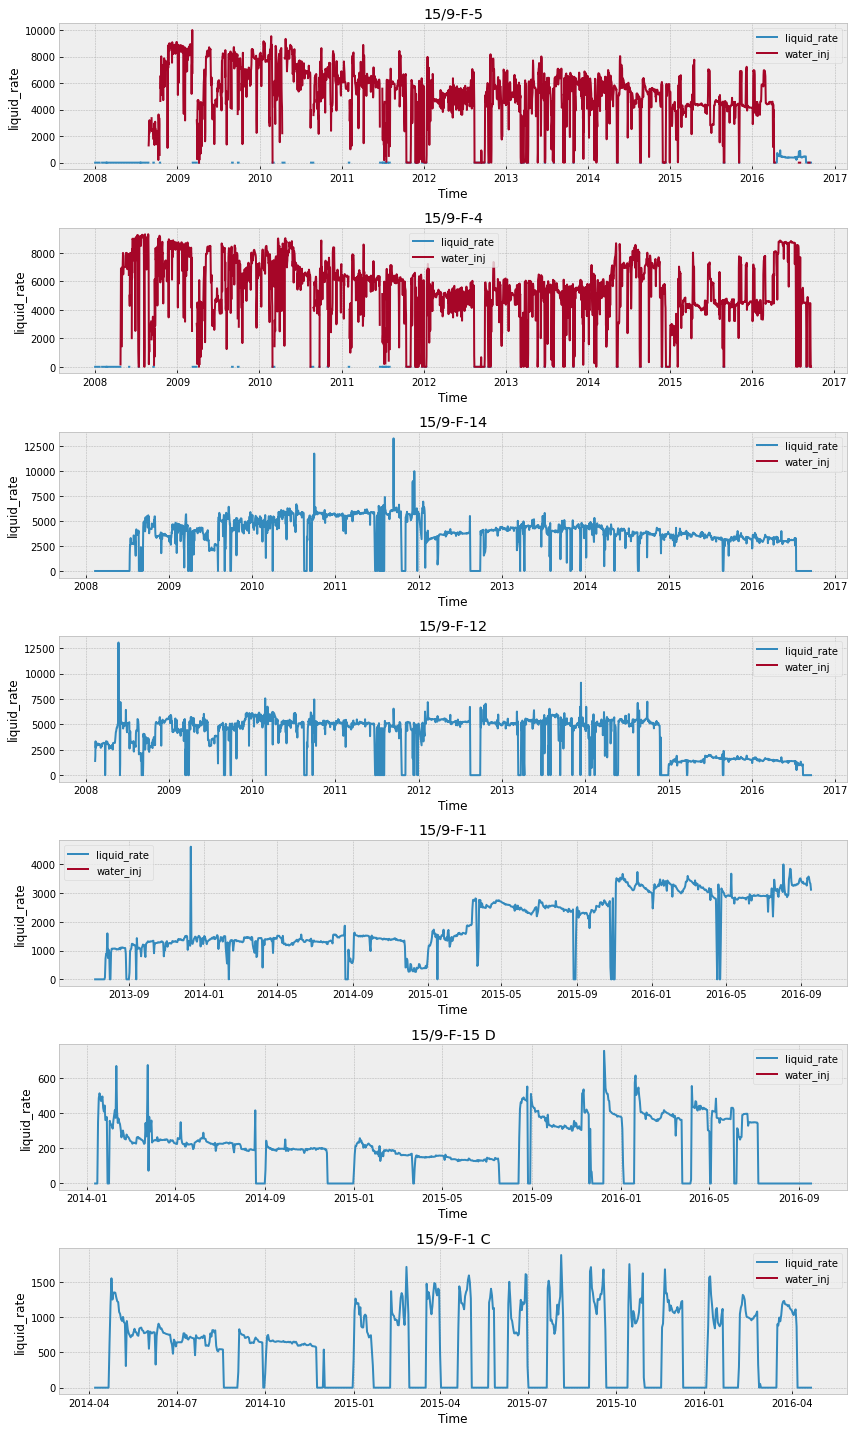

In [19]:
wells = df_ml["well_name"].unique()
plt.figure(figsize=(12, 20))
for i, well in enumerate(wells):
    d = df_ml[df_ml["well_name"] == well]
    plt.subplot(len(wells), 1, i+1)
    plt.plot(d.index, d["QL"], label='liquid_rate')
    plt.legend()
    plt.plot(d.index, d["Water_inj_vol"], label='water_inj')
    plt.legend()
    plt.title(well)
    plt.xlabel("Time")
    plt.ylabel("liquid_rate")

plt.tight_layout()
plt.show()

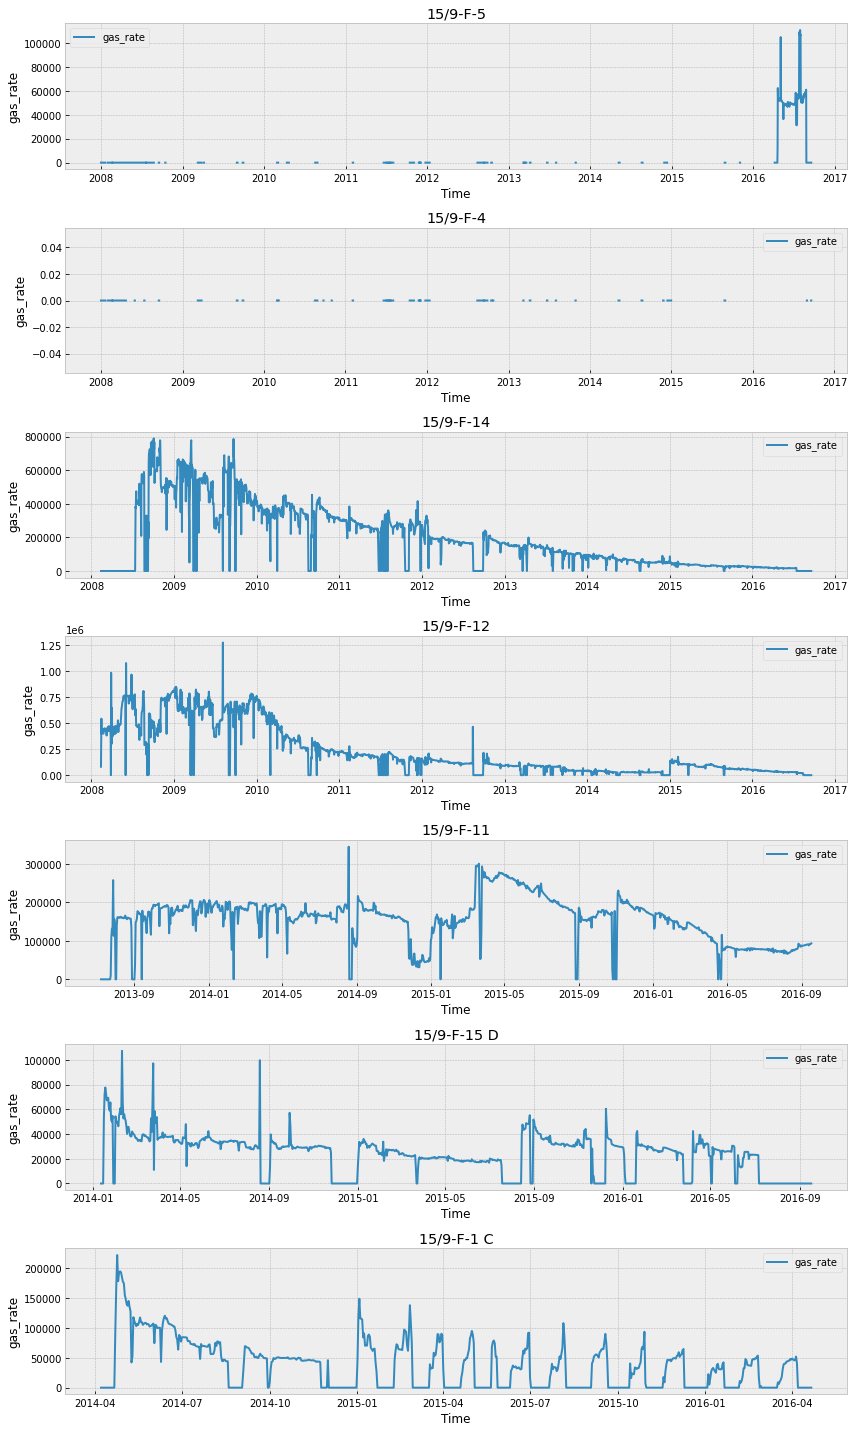

In [21]:
wells = df_ml["well_name"].unique()
plt.figure(figsize=(12, 20))
for i, well in enumerate(wells):
    d = df_ml[df_ml["well_name"] == well]
    plt.subplot(len(wells), 1, i+1)
    plt.plot(d.index, d["QG"], label='gas_rate')
    plt.legend()
    plt.title(well)
    plt.xlabel("Time")
    plt.ylabel("gas_rate")

plt.tight_layout()
plt.show()

In [39]:
print(wells)
df_ml.drop('Water_inj_vol', axis=1, inplace=True)

['15/9-F-5' '15/9-F-4' '15/9-F-14' '15/9-F-12' '15/9-F-11' '15/9-F-15 D'
 '15/9-F-1 C']


In [27]:
df_ml = df_ml[df_ml['well_name'] != '15/9-F-5']
df_ml = df_ml[df_ml['well_name'] != '15/9-F-4']

In [29]:
df_ml['well_name'].unique()

array(['15/9-F-14', '15/9-F-12', '15/9-F-11', '15/9-F-15 D', '15/9-F-1 C'],
      dtype=object)

In [34]:
well_prod_L = df_ml.groupby('well_name')["QL"].sum()  
well_prod_L

well_name
15/9-F-1 C     3.976760e+05
15/9-F-11      2.286553e+06
15/9-F-12      1.188203e+07
15/9-F-14      1.146869e+07
15/9-F-15 D    2.082412e+05
Name: QL, dtype: float64

In [35]:
fig_o = px.pie(names = well_prod_L.index , values = well_prod_L.values , labels ={"names":"Well ", "values":"Total oil production (bbls)"},
            )
fig_o.update_traces(textposition='inside', textinfo='percent+label'
            ,hoverinfo ='percent+label',marker=dict(line=dict(color='#000000', width=2)))
fig_o.update_layout(
title_text = "Contribution of each well in oil production",legend_title_text="Wells",legend_title_font_size=15,
    title_x=.5 , title_font_size=20, paper_bgcolor="#0C2D42",font_color="#fff"
)
fig_o.show() 

In [36]:
well_prod_G = df_ml.groupby('well_name')["QG"].sum()  
well_prod_G

well_name
15/9-F-1 C     2.707820e+07
15/9-F-11      1.793804e+08
15/9-F-12      6.933971e+08
15/9-F-14      6.012161e+08
15/9-F-15 D    2.347750e+07
Name: QG, dtype: float64

In [37]:
fig_o = px.pie(names = well_prod_L.index , values = well_prod_L.values , labels ={"names":"Well ", "values":"Total oil production (bbls)"},
            )
fig_o.update_traces(textposition='inside', textinfo='percent+label'
            ,hoverinfo ='percent+label',marker=dict(line=dict(color='#000000', width=2)))
fig_o.update_layout(
title_text = "Contribution of each well in oil production",legend_title_text="Wells",legend_title_font_size=15,
    title_x=.5 , title_font_size=20, paper_bgcolor="#0C2D42",font_color="#fff"
)
fig_o.show() 

In [40]:
well1 = df_ml.groupby('well_name').get_group('15/9-F-12').drop('well_name', axis=1)
well2 = df_ml.groupby('well_name').get_group('15/9-F-11').drop('well_name', axis=1)
well3 = df_ml.groupby('well_name').get_group('15/9-F-14').drop('well_name', axis=1)
well4 = df_ml.groupby('well_name').get_group('15/9-F-1 C').drop('well_name', axis=1)
well5 = df_ml.groupby('well_name').get_group('15/9-F-15 D').drop('well_name', axis=1)

In [43]:
well3.sort_index().head()

,bhp,bht,dp_tubing,thp,tht,choke_size_percentage,QL,QG
date,,,,,,,,
2008-02-12,0.0,0.0,0.0,0.0,0.0,0.05885,0.0,0.0
2008-02-13,0.0,0.0,0.0,0.0,0.0,0.06768,0.0,0.0
2008-02-14,0.0,0.0,0.0,0.0,0.0,0.04950,0.0,0.0
2008-02-15,0.0,0.0,0.0,0.0,0.0,0.06640,0.0,0.0
2008-02-16,0.0,0.0,0.0,0.0,0.0,0.10479,0.0,0.0


In [53]:
def plot_dfs(df, titel=None):
   
    columns = df.loc[:,:].columns.tolist()
    subplots_size = len(columns)
    fig, ax = plt.subplots(subplots_size, 1, figsize=(30, 30))
    plt.subplots_adjust(hspace=0.75)
    fig.suptitle = titel

    for i, colname in enumerate(columns):
        df[colname].plot(ax=ax[i])
        ax[i].set_title(colname)
        
    plt.show(  )

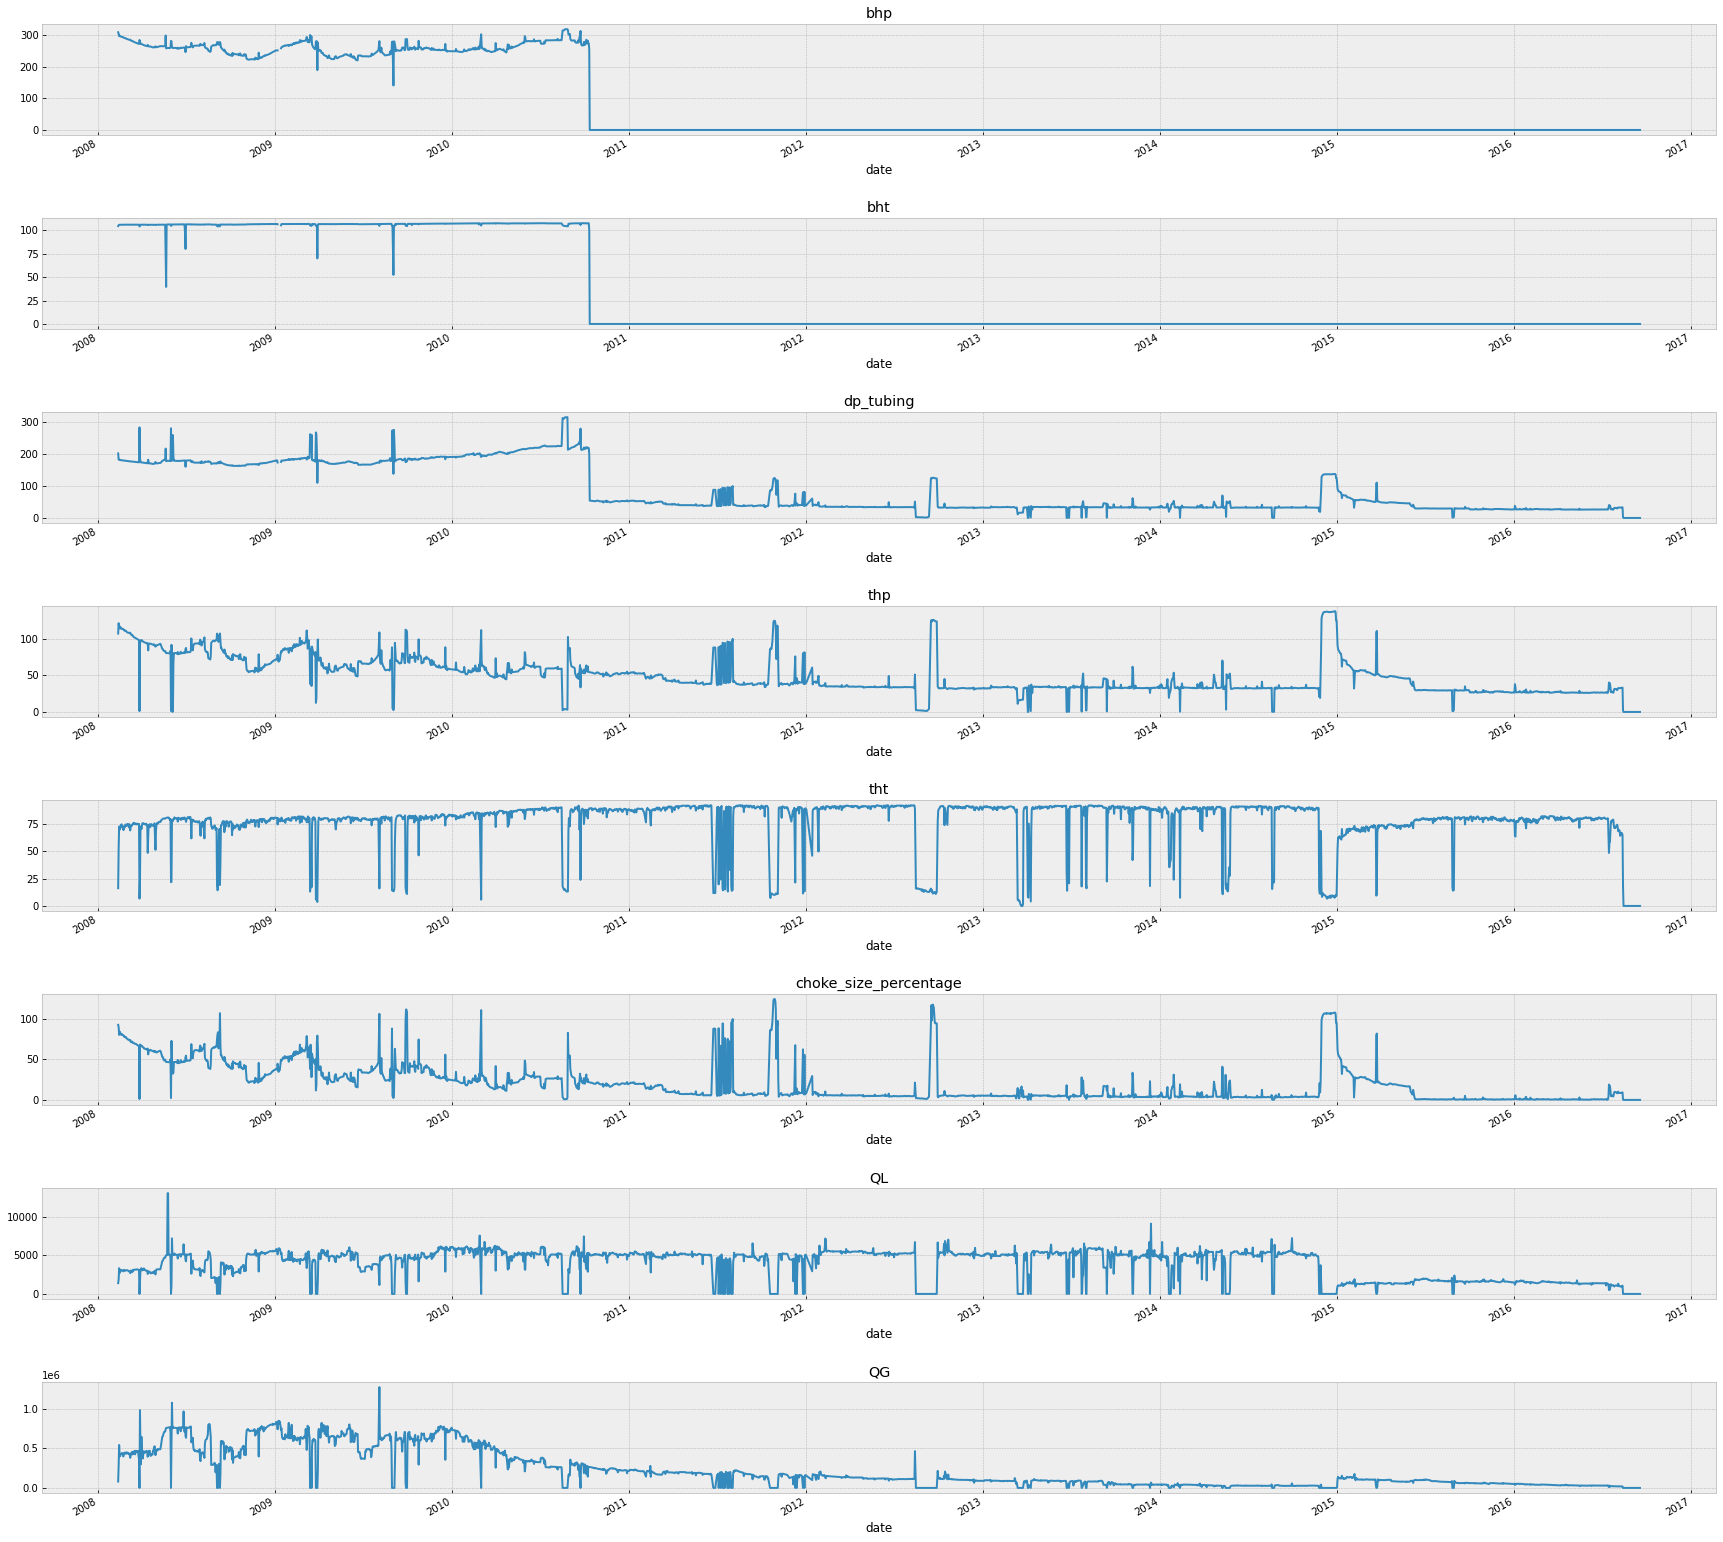

In [55]:
plot_dfs(well1, titel=None)

In [65]:
len(well1)

3056

In [64]:
well1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3056 entries, 2008-02-12 to 2016-09-17
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bhp                    3050 non-null   float64
 1   bht                    3050 non-null   float64
 2   dp_tubing              3050 non-null   float64
 3   thp                    3056 non-null   float64
 4   tht                    3056 non-null   float64
 5   choke_size_percentage  3056 non-null   float64
 6   QL                     3056 non-null   float64
 7   QG                     3056 non-null   float64
dtypes: float64(8)
memory usage: 214.9 KB


In [78]:
well1 = well1.interpolate(method='linear')
well1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3056 entries, 2008-02-12 to 2016-09-17
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bhp                    3056 non-null   float64
 1   bht                    3056 non-null   float64
 2   dp_tubing              3056 non-null   float64
 3   thp                    3056 non-null   float64
 4   tht                    3056 non-null   float64
 5   choke_size_percentage  3056 non-null   float64
 6   QL                     3056 non-null   float64
 7   QG                     3056 non-null   float64
dtypes: float64(8)
memory usage: 214.9 KB


<AxesSubplot:>

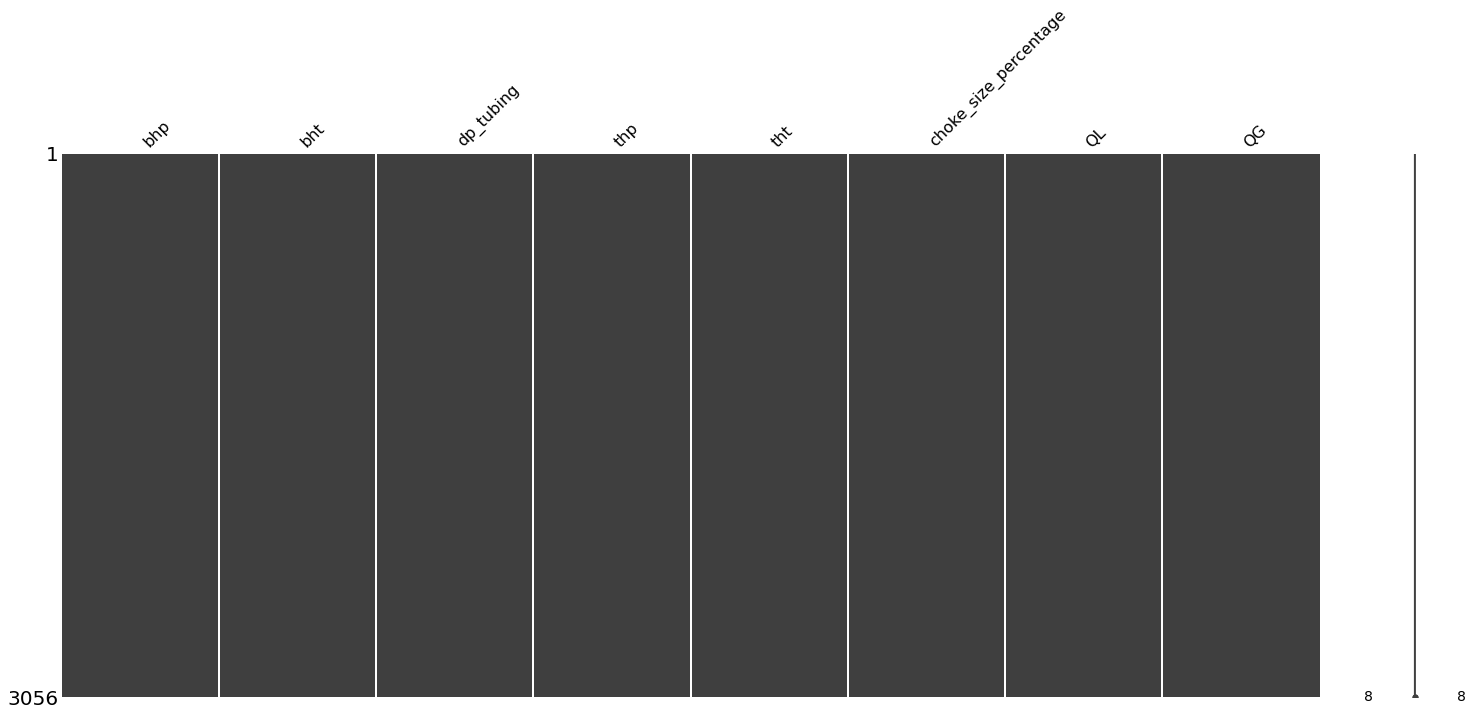

In [80]:
msn.matrix(well1)

In [79]:
well1.to_csv('well1.csv')